In [1]:
import scipy.stats as stats
import numpy as np
import os
import matplotlib.pyplot as plt
import sklearn.linear_model

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
volumes = np.array([4.6710,  68.8410,   8.3490,   0.8130,  13.0830,  19.8750,   2.2920,
          0.8910,   8.4840,  31.9050,  21.8670,  46.6920,   2.4270,  39.0180,
          6.4380,   9.6360,   3.3360,   1.9350,   3.2820,   0.8220,   3.3990,
         53.8350,  30.1410,   3.1560,   4.7640,   6.3180,  14.4810,  51.7260,
          1.1070,   1.8150,   3.3420,  13.3050,   2.0220,  26.2980,  10.8720,
         11.2050,   7.1280,   7.6890,  12.9540,   6.1260,  45.1320,  11.6040,
          5.6010,   1.0860,   3.4260,   4.0530,   9.3600,  13.1550,   1.2450,
         14.2860,   7.3680,  24.8430,  80.5110,   0.9030,   3.0600,   1.3560,
          3.2910,  10.8180,   2.3940,   7.6200,  18.1740,  34.9800,  12.3030,
          4.6650,  23.2860,  20.2620,  27.1530,  20.2740,   8.8740,   0.9660,
          4.3350,  11.9040,  22.2810,   9.4530,  28.9200,  18.0210,  61.0320,
         18.1650,   4.4580,   2.5440,   4.1790,   6.6660,   1.5420,  51.7230,
         14.3940,   7.6530,  12.8760,   2.1840,  15.5580,  12.3210,  35.3580,
         54.0120,  40.0590,  19.7490,  23.6940,  13.9590,   1.9590,   1.8330,
          4.3440,  15.0990,  14.0130,   1.0080,   4.8810,   2.9940,  42.0960,
         22.0080,   1.8210,   2.1840,  29.4360, 194.8920])

In [3]:
folders = os.listdir('.')

In [4]:
names_map = {"dice_standard_":"Dice", "dice_plusplus_gamma3":"Dice++", "spherical_topk1_":"SphereTopk1", "xent_e_":"CE", "dice_temp_scaled":"TempDice"}

In [5]:
loss_name = "spherical_topk1_"
# loss_name = "dice_plusplus_gamma3"
selected_data_files = [[f"{f}/curve_data.txt" for f in folders if loss_name in f] for loss_name in names_map.keys()]

In [6]:
selected_data_files

[['dice_standard_1/curve_data.txt',
  'dice_standard_2/curve_data.txt',
  'dice_standard_3/curve_data.txt'],
 ['dice_plusplus_gamma3_2/curve_data.txt',
  'dice_plusplus_gamma3_1/curve_data.txt',
  'dice_plusplus_gamma3_3/curve_data.txt'],
 ['spherical_topk1_2/curve_data.txt',
  'spherical_topk1_1/curve_data.txt',
  'spherical_topk1_3/curve_data.txt'],
 ['xent_e_2/curve_data.txt',
  'xent_e_3/curve_data.txt',
  'xent_e_1/curve_data.txt'],
 ['dice_temp_scaled_3/curve_data.txt',
  'dice_temp_scaled_2/curve_data.txt',
  'dice_temp_scaled_1/curve_data.txt']]

In [7]:
def read_data(file):
    with open(file) as f:
        lines = f.read()
        return lines

In [8]:
def strip_extra_spacing(string):
    new_string = []
    first_char = True
    for i in range(len(string)-1):
        if string[i] == ' ' and (string[i+1] == ' ' or first_char):
            continue
        new_string.append(string[i])
        first_char = False
    
    if string[-1] != ' ':
        new_string.append(string[-1])
    
    new_string = ''.join(new_string)
    return new_string

In [9]:
def load_lists(data_file):
    lines = read_data(data_file)
    l = lines.replace('\n','').replace(',','')
    lists = l.split(':')[1:]
    lists = [l.replace('[', '').split(']')[0] for l in lists]
    lists = [strip_extra_spacing(l).split(' ') for l in lists]
    lists = [np.array([float(i) for i in l]) for l in lists]
    
    return lists

In [10]:
raw_lists = [[load_lists(df) for df in folder] for folder in selected_data_files]

In [11]:
def get_mean_values(data_files):
    all_lists = [load_lists(df) for df in data_files]
    
    mean_lists = [np.mean(np.array([all_lists[i][j] for i in range(len(all_lists))]), axis=0) for j in range(len(all_lists[0]))]
    return mean_lists

In [12]:
def get_std_values(data_files):
    all_lists = [load_lists(df) for df in data_files]

    std_lists = [np.std(np.array([all_lists[i][j] for i in range(len(all_lists))]), axis=0) for j in range(len(all_lists[0]))]
    return std_lists

In [13]:
all_lists = [get_mean_values(folders) for folders in selected_data_files]
std_lists = [get_std_values(folders) for folders in selected_data_files]

In [14]:
np.logical_not(np.isnan(all_lists[0][2]))

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [15]:
np.copy(all_lists[0][1])

array([           nan, 3.22634745e-04, 3.13014261e-01, 3.32967927e-01,
       3.27664480e-01, 3.33132847e-01, 3.39758762e-01, 3.38440761e-01,
       3.46288110e-01, 3.46763481e-01, 3.40856686e-01, 3.53675856e-01,
       3.52810917e-01, 3.52247603e-01, 3.68530445e-01, 3.80984047e-01,
       3.72798217e-01, 3.84438737e-01, 3.92170019e-01, 5.36936112e-01])

In [16]:
from sklearn.linear_model import LinearRegression, TheilSenRegressor, HuberRegressor
from sklearn.linear_model import RANSACRegressor

In [17]:
np.argsort(volumes)

array([  3,  19,   7,  53,  69, 101,  43,  28,  48,  55,  82,  29, 106,
        97,  17,  96,  32,  87, 107,   6,  58,  12,  79, 103,  54,  23,
        18,  56,  16,  30,  20,  44,  45,  80,  70,  98,  78,  63,   0,
        24, 102,  42,  39,  25,  14,  81,  36,  50,  59,  85,  37,   2,
         8,  68,  46,  73,  15,  57,  34,  35,  41,  71,  62,  89,  86,
        38,   4,  47,  31,  95, 100,  49,  84,  26,  99,  88,  75,  77,
        60,  93,   5,  65,  67,  10, 105,  72,  64,  94,  51,  33,  66,
        74, 108,  22,   9,  61,  90,  13,  92, 104,  40,  11,  83,  27,
        21,  91,  76,   1,  52, 109])

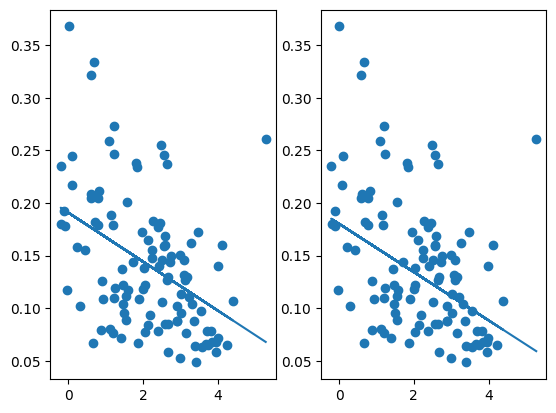

In [18]:
example_y = all_lists[1][2]
example_x = np.reshape(np.log(volumes), (110,1))

plt.subplot(1,2,1)
reg = LinearRegression()
reg.fit(example_x, example_y)
slope = reg.coef_
intercept = reg.intercept_

plt.plot(example_x, slope * example_x + intercept)
plt.scatter(example_x, example_y)

plt.subplot(1,2,2)
reg = TheilSenRegressor()
reg.fit(example_x, example_y)
slope = reg.coef_
intercept = reg.intercept_

plt.plot(example_x, slope * example_x + intercept)
plt.scatter(example_x, example_y)

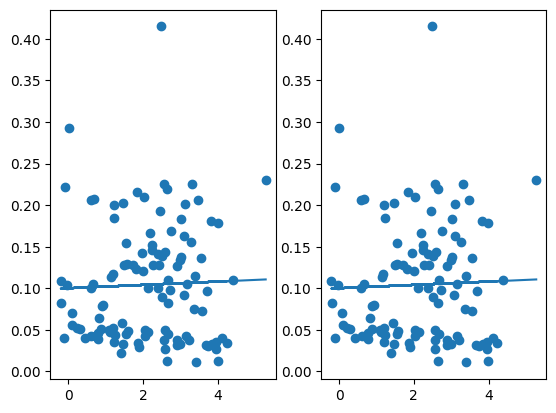

In [19]:
example_y = all_lists[3][2]
example_x = np.reshape(np.log(volumes), (110,1))

plt.subplot(1,2,1)
reg = LinearRegression()
reg.fit(example_x, example_y)
slope = reg.coef_
intercept = reg.intercept_

plt.plot(example_x, slope * example_x + intercept)
plt.scatter(example_x, example_y)

plt.subplot(1,2,2)
reg = HuberRegressor(epsilon=20)
reg.fit(example_x, example_y)
slope = reg.coef_
intercept = reg.intercept_

plt.plot(example_x, slope * example_x + intercept)
plt.scatter(example_x, example_y)

In [20]:
def plot_metric_vs_volume(list_of_lists, names, colours, line_styles, idx, ylabel, use_spearman=False, use_theil_sen=False, ylim=None):
    
    
    fig, ax = plt.subplots()

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    for lists, name, color, line_style in zip(list_of_lists, names, colours, line_styles):
        reg = sklearn.linear_model.LinearRegression()
        volume_indexes = np.argsort(volumes)

        # # with broker outlier
        # selected_volumes = volumes
        # eces = lists[idx]

        # without broken outlier (conviniently the largest volume exmaple
        selected_volumes = volumes[volume_indexes[:-1]]
        eces = lists[idx][volume_indexes[:-1]]
        
        # remove nans
        non_nans = np.logical_not(np.isnan(eces))
        eces = eces[non_nans]
        selected_volumes = selected_volumes[non_nans]
        
        #print(eces)

        log_vol = np.log(selected_volumes)
        vol = np.copy(selected_volumes)
        
        if not use_spearman:
            corr_obj = stats.pearsonr(log_vol, eces)
        else:
            corr_obj = stats.spearmanr(log_vol, eces)
        statistic = corr_obj.statistic
        pvalue = corr_obj.pvalue

        # Input data points
        x = log_vol
        y = eces

        # Perform linear regression
        if use_theil_sen:
            reg = TheilSenRegressor()
            reg.fit(np.reshape(x, (len(x), 1)), y)
            slope = reg.coef_[0]
            intercept = reg.intercept_
            std_err = stats.sem(x)
        else:
            slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
        # print(std_err)
        # print(slope, intercept)

        # Calculate confidence interval
        n = len(x)
        t_value = stats.t.ppf(0.975, n - 2)  # Two-tailed t-value for 95% confidence interval
        y_pred = intercept + slope * np.array(x)
        y_err = t_value * std_err * np.sqrt(1/n + (np.array(x) - np.mean(x))**2 / np.sum((np.array(x) - np.mean(x))**2))
        y_std = np.std(y_pred - np.array(y))

        # Plot the points and line of best fit
        #plt.scatter(x, y, label='Data Points')
        # plt.plot(vol, y_pred, color=color, label=f'{name} $r={statistic:.2}, p={pvalue:.2}$\n $y = {slope:.2}ln(x)+{intercept:.2}$')
        plt.plot(vol, y_pred, color=color, linestyle=line_style, linewidth=2, label=f'{name}\n$r={statistic:.2}, p={pvalue:.2}$\n')

        # Plot the confidence interval
        # plt.fill_between(vol, y_pred - y_err, y_pred + y_err, color=color, alpha=0.3)#, label='Confidence Interval')
        plt.fill_between(vol, y_pred - y_std, y_pred + y_std, color=color, alpha=0.08)
        # plt.plot(vol, y_pred - y_std, color=color, alpha=0.1, linestyle='dashed',linewidth=2, markersize=12)
        # plt.plot(vol, y_pred + y_std, color=color, alpha=0.1, linestyle='dashed',linewidth=2, markersize=12)


        # Add labels and legend
        plt.xlabel(r'Ground Truth WMH Volume ($mm^3$)', fontsize='xx-large')
        plt.ylabel(ylabel, fontsize='xx-large')
        plt.xscale('log')
        plt.ylim(ylim)
        plt.xticks(fontsize='x-large')
        plt.yticks(fontsize='x-large')
        plt.legend(loc='upper right', prop={'size':13}, labelspacing=-0.5, bbox_to_anchor=(1.04, 1.05), borderpad=0.2)
        plt.savefig(f'{ylabel}_vs_volume.pdf', bbox_inches='tight')
        


In [21]:
#help(plt.legend)

In [22]:
plt.style.use('tableau-colorblind10')

In [23]:
# colors = ['red', 'black', 'blue', 'yellow', 'lime']
colors = ['red', 'goldenrod', 'blue', 'magenta', '#e6e60b']
line_styles = ['dashdot','dotted', 'dashed', 'solid', (0, (3,1,1,1,1,1))]

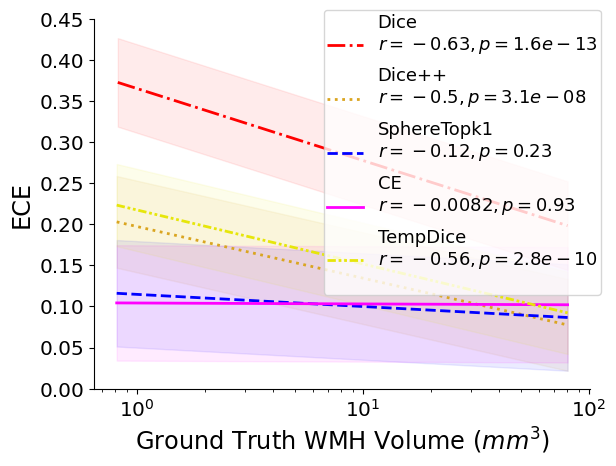

In [24]:
plot_metric_vs_volume(all_lists, names_map.values(), colors, line_styles, 2, 'ECE', use_spearman=False, ylim=(0,0.45))

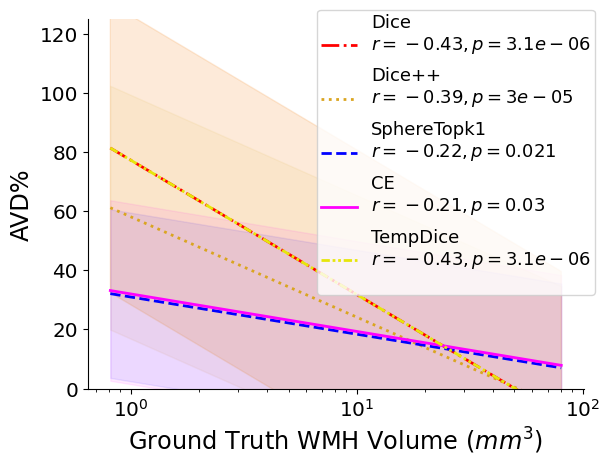

In [25]:
plot_metric_vs_volume(all_lists, names_map.values(), colors, line_styles, 5, 'AVD%', ylim=(0,125))

In [39]:
def plot_calibration_curve(means, names, colours, line_styles):
    for lists, name, color, line_style in zip(means, names, colours, line_styles):
        plt.plot(lists[0], lists[1], color=color, label=f'{name}', linestyle=line_style, linewidth=2)

    plt.plot([0,1], [0,1], color='black')
    
    plt.xlabel('Softmax Confidence', fontsize='xx-large')
    plt.ylabel('Proprtion of WMH', fontsize='xx-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    plt.legend(fontsize='x-large')
    plt.savefig(f'calibration_curve.pdf', bbox_inches='tight')

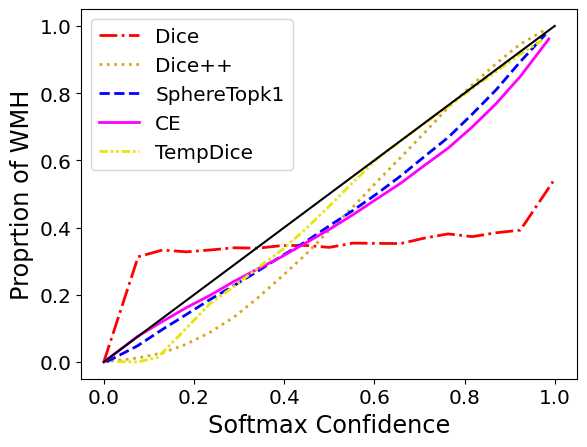

In [40]:
plot_calibration_curve(all_lists, names_map.values(), colors, line_styles)

In [44]:
def plot_all_uq_metric_curves(all_list_of_lists, means, stds, names, colours, line_styles, idx, ylabel):
    taus = np.arange(0, 1.1, 0.05)/1.1
    
    # find point of max ueo per example
    max_ueo_points = [np.array([np.argmax(l[6]) for l in lists]) for lists in all_list_of_lists]
    max_ueo_means = [int(np.round(np.mean(l))) for l in max_ueo_points]
    max_ueo_stds = [np.std(taus[l]) for l in max_ueo_points]
    
    print(max_ueo_means)
    
    mean_lists = [np.mean(np.array([all_lists[i][j] for i in range(len(all_lists))]), axis=0) for j in range(len(all_lists[0]))]
    
    print(max_ueo_points)
    
    for lists, stds, name, color, line_style, argmax_ueo, argmax_ueo_std in zip(means, stds, names, colours, line_styles, max_ueo_means, max_ueo_stds):
        # Plot the points and line of best fit
        #plt.scatter(x, y, label='Data Points')
        plt.plot(taus, lists[idx], color=color, linestyle=line_style, linewidth=2, label=f'{name}')
        plt.fill_between(taus, lists[idx] - stds[idx], lists[idx] + stds[idx], color=color, alpha=0.3)
        
        plt.errorbar(taus[argmax_ueo], lists[idx][argmax_ueo], xerr=argmax_ueo_std, fmt='s',color=color, ecolor='black',elinewidth=1,capsize=5)
        plt.scatter(taus[argmax_ueo], lists[idx][argmax_ueo], color=color, edgecolor='black', marker='s', s=60, zorder=2)

        # Plot the confidence interval
        #plt.fill_between(vol, y_pred - y_err, y_pred + y_err, color=color, alpha=0.3)#, label='Confidence Interval')
        # plt.fill_between(x, y_pred - y_std, y_pred + y_std, color='red', alpha=0.3, label='Standard Deviation')

    # Add labels and legend
    plt.xlabel(r'$\tau$', fontsize='xx-large')
    plt.xlim((0,1))
    plt.ylabel(ylabel, fontsize='xx-large')
    plt.xticks(fontsize='x-large')
    plt.yticks(fontsize='x-large')
    # plt.legend(loc='upper right', prop={'size':12}, labelspacing=-0.5, bbox_to_anchor=(1.04, 1.05), borderpad=0.2)
    plt.legend(fontsize=12)
    plt.savefig(f'{ylabel}_metric.pdf', bbox_inches='tight')

In [45]:
#plt.style.use('ggplot')

[5, 12, 12, 10, 19]
[array([ 1,  1, 14]), array([12, 12, 13]), array([11, 12, 12]), array([10, 11, 10]), array([20, 17, 20])]


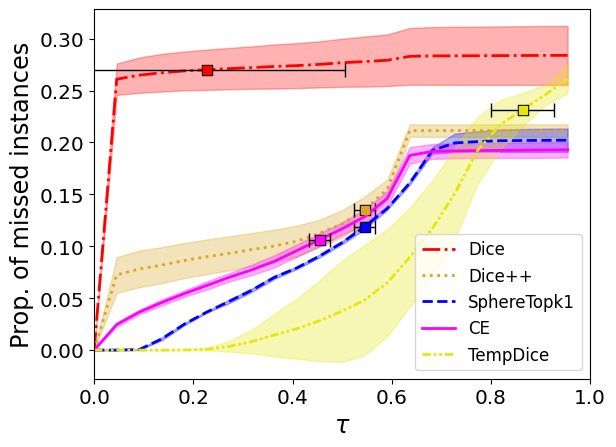

In [46]:
plot_all_uq_metric_curves(raw_lists, all_lists, std_lists, names_map.values(), colors, line_styles, 10, "Prop. of missed instances")

[5, 12, 12, 10, 19]
[array([ 1,  1, 14]), array([12, 12, 13]), array([11, 12, 12]), array([10, 11, 10]), array([20, 17, 20])]


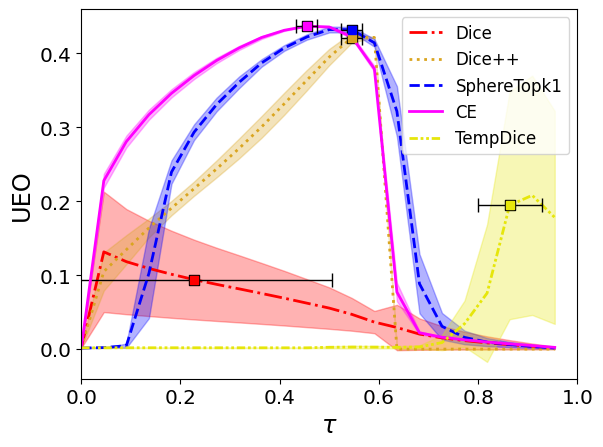

In [47]:
plot_all_uq_metric_curves(raw_lists, all_lists, std_lists, names_map.values(), colors, line_styles, 6, "UEO")

[5, 12, 12, 10, 19]
[array([ 1,  1, 14]), array([12, 12, 13]), array([11, 12, 12]), array([10, 11, 10]), array([20, 17, 20])]


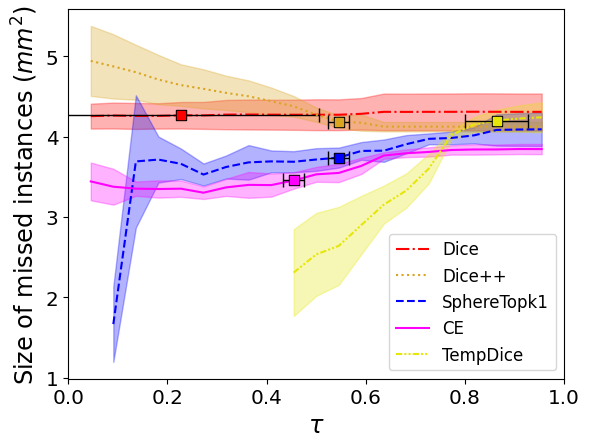

In [34]:
plot_all_uq_metric_curves(raw_lists, all_lists, std_lists, names_map.values(), colors, line_styles, 8, r"Size of missed instances ($mm^2$)")